In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading(Data Source: JHU)

In [2]:
confirmed_df  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558


In [5]:
cols = confirmed_df.keys()
confirmed  = confirmed_df.loc[:, cols[4]:]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21
0,0,0,0,0,0,0,0,0,0,0,...,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044
1,0,0,0,0,0,0,0,0,0,0,...,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528
2,0,0,0,0,0,0,0,0,0,0,...,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842
3,0,0,0,0,0,0,0,0,0,0,...,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393
4,0,0,0,0,0,0,0,0,0,0,...,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558


# COVID19 Country/Region Cases Comparison

## Legend:

- RED: Critical
- BLUE: Mid-level
- GREEN: Stable

mean_world_cases = 0.03166804779624688


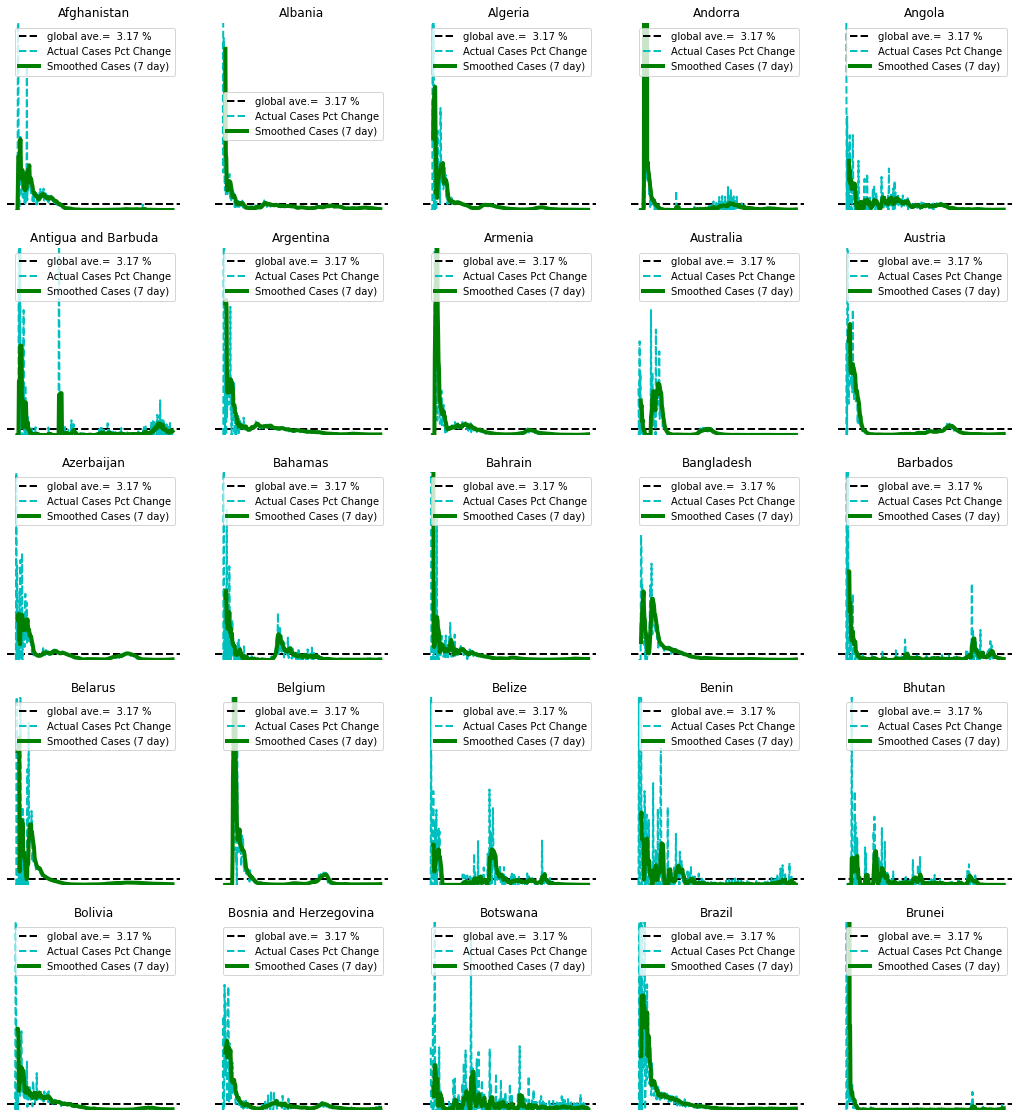

In [6]:
dates   = confirmed.keys()
country_reg = confirmed_df['Country/Region'].unique()

world_cases = pd.Series([confirmed[i].sum() for i in dates])

world_mean_change = world_cases.pct_change().mean()

print('mean_world_cases =', world_mean_change)

def plot_cases(start = 0, batch_sz= 25, columns = 5): 
    rows    = int(np.ceil(batch_sz/columns))
    fig     = plt.figure(figsize=(18, 4*rows))
    color   = None

    for i in range(1, columns*rows + 1):
        idx = start + i
        if idx <= len(country_reg):
            country = country_reg[idx-1]
            cases = pd.Series([confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates])
            cases_ac = cases.pct_change()
            cases_ma = cases_ac.rolling(window=7).mean()
            
            if cases_ma.iloc[-1] <= world_mean_change:
                color = 'green'
            else:
                color = 'red'
            fig.add_subplot(rows, columns, i)
            plt.axhline(y = world_mean_change,linestyle='--', color='black', linewidth=2)
            plt.plot(range(len(dates)), cases_ac, 'c--', linewidth=2)
            plt.plot(range(len(dates)), cases_ma, linewidth=4, color = color)
            plt.title(f'{country}')
            plt.legend([f'global ave.= {100*world_mean_change: 0.2f} %', 
            'Actual Cases Pct Change',
           'Smoothed Cases (7 day)'])
            plt.ylim([0.0, 1.0])
            plt.axis('off')

    plt.show()
    
k = 0    
plot_cases(k)

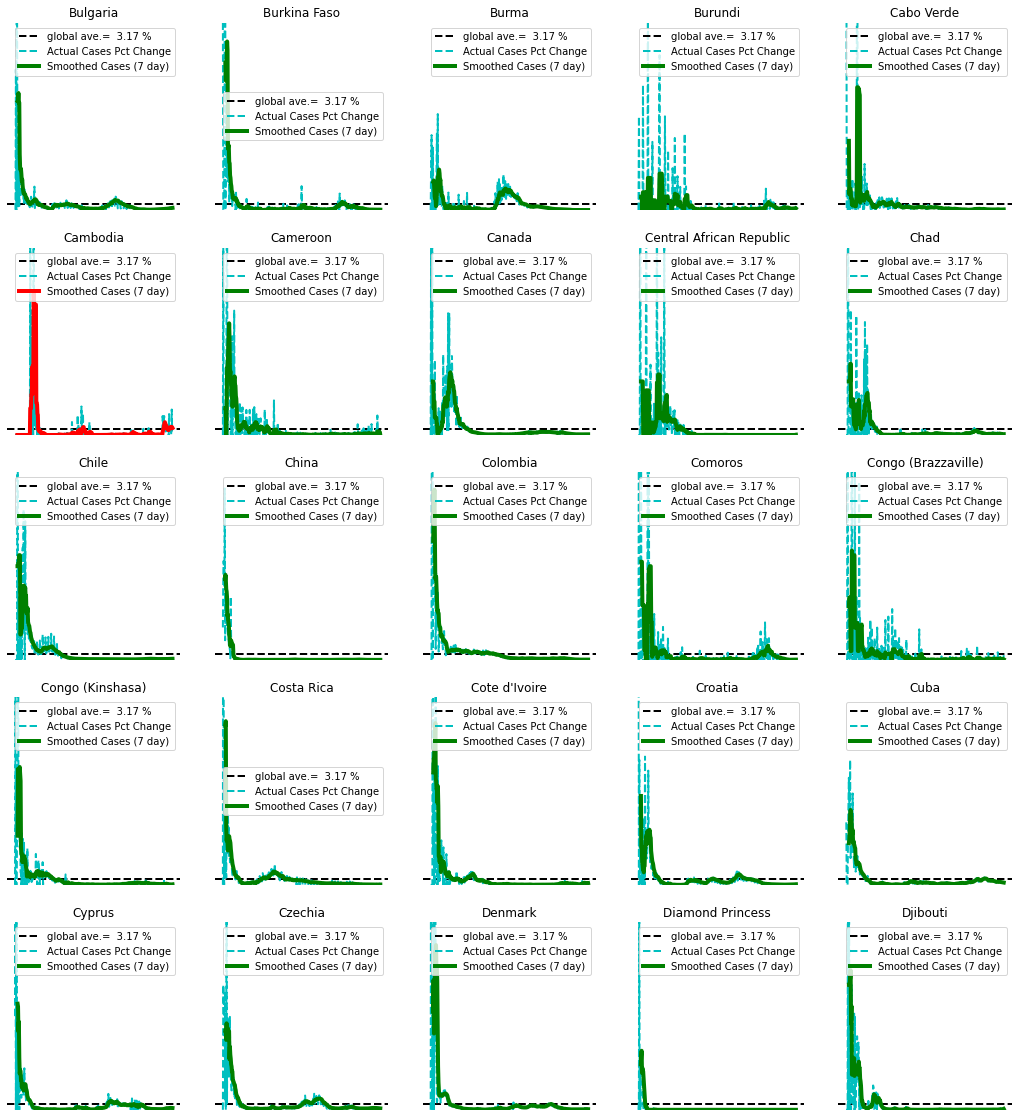

In [7]:
k += 25
plot_cases(k)

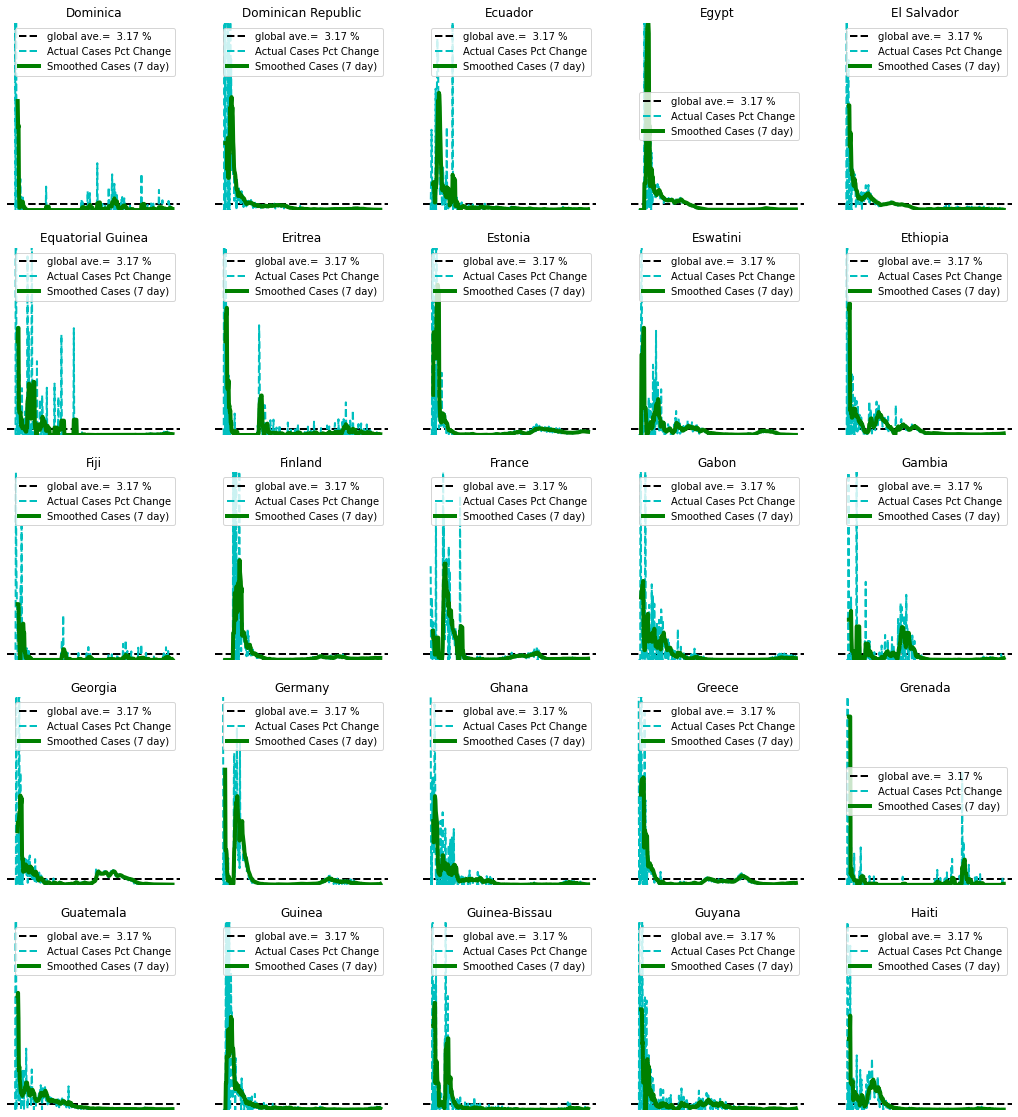

In [8]:
k += 25
plot_cases(k)

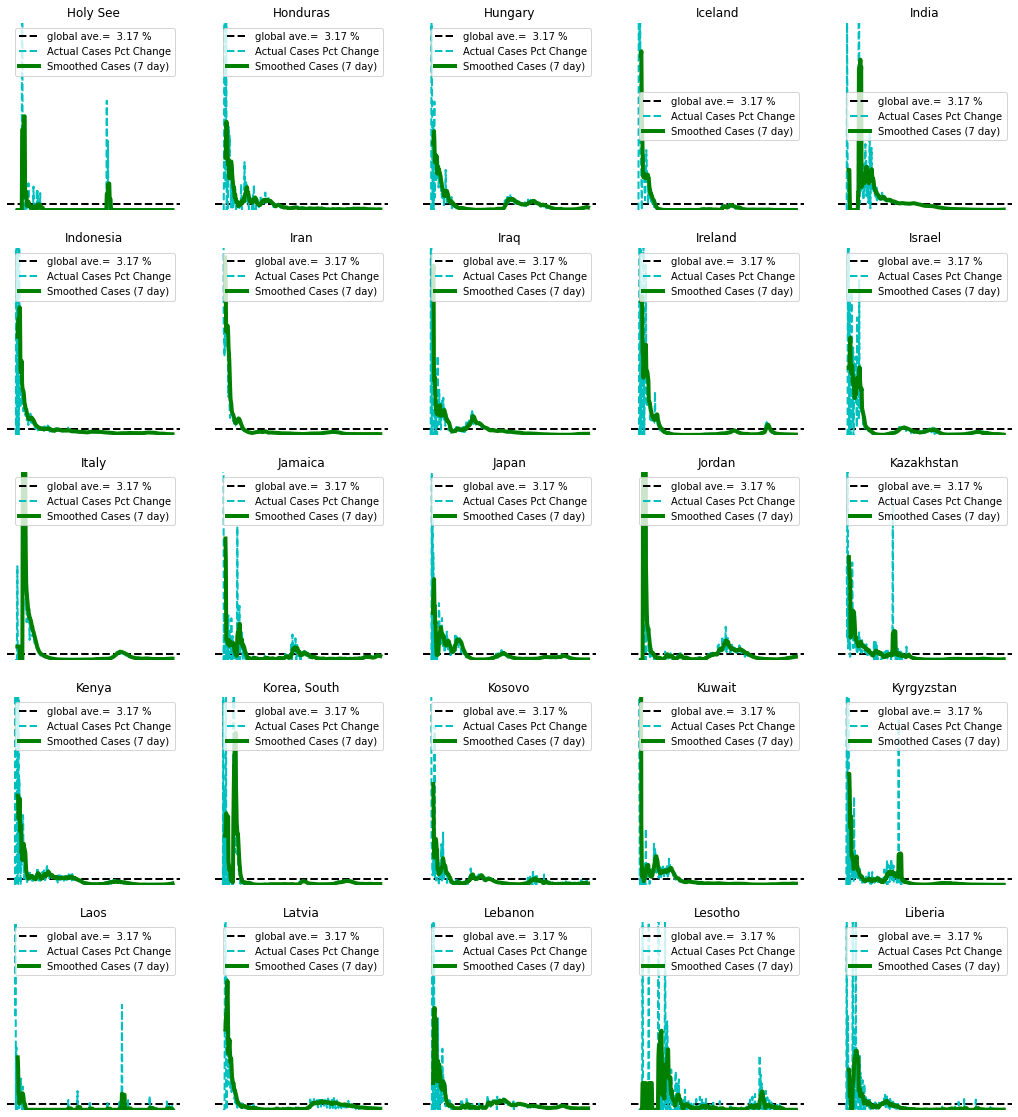

In [9]:
k += 25
plot_cases(k)

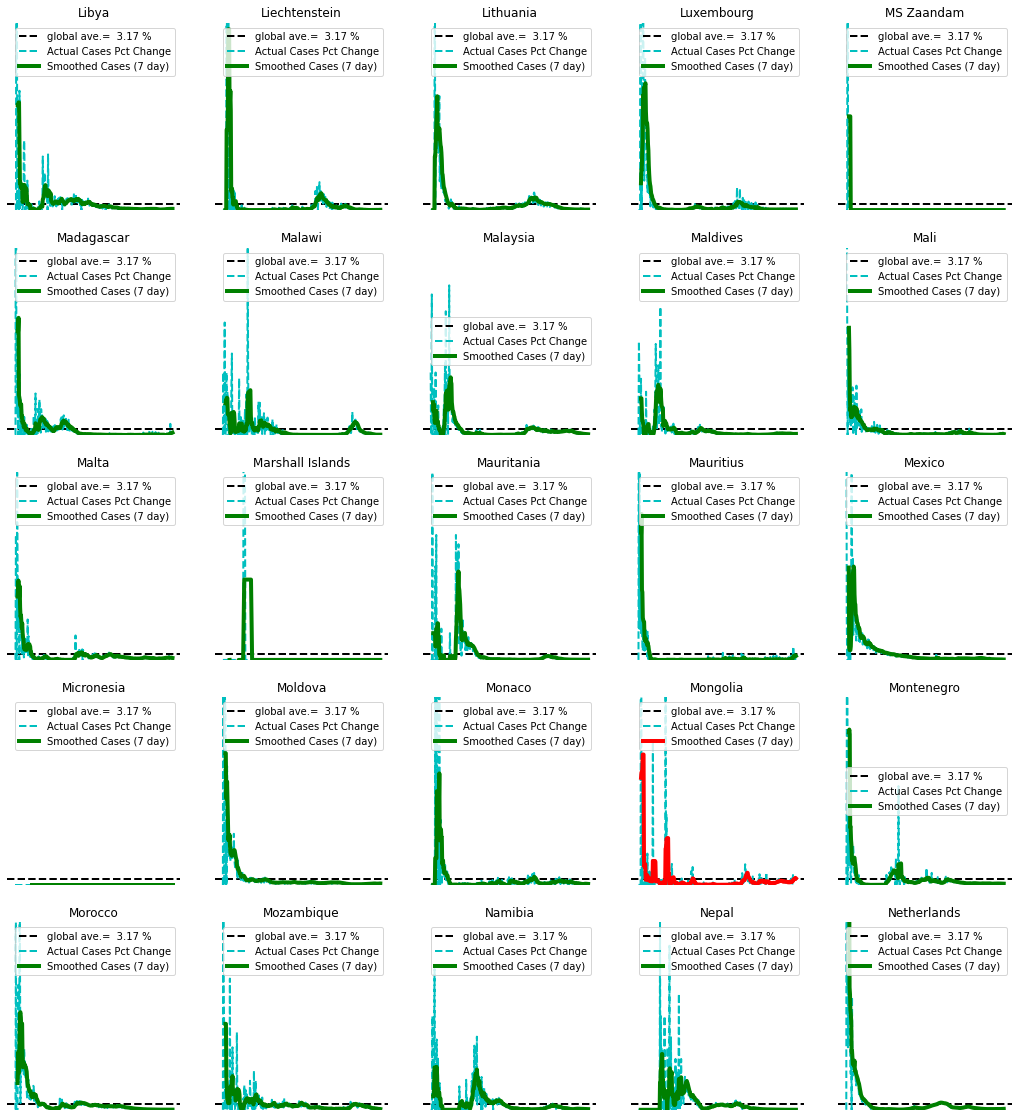

In [10]:
k += 25
plot_cases(k)

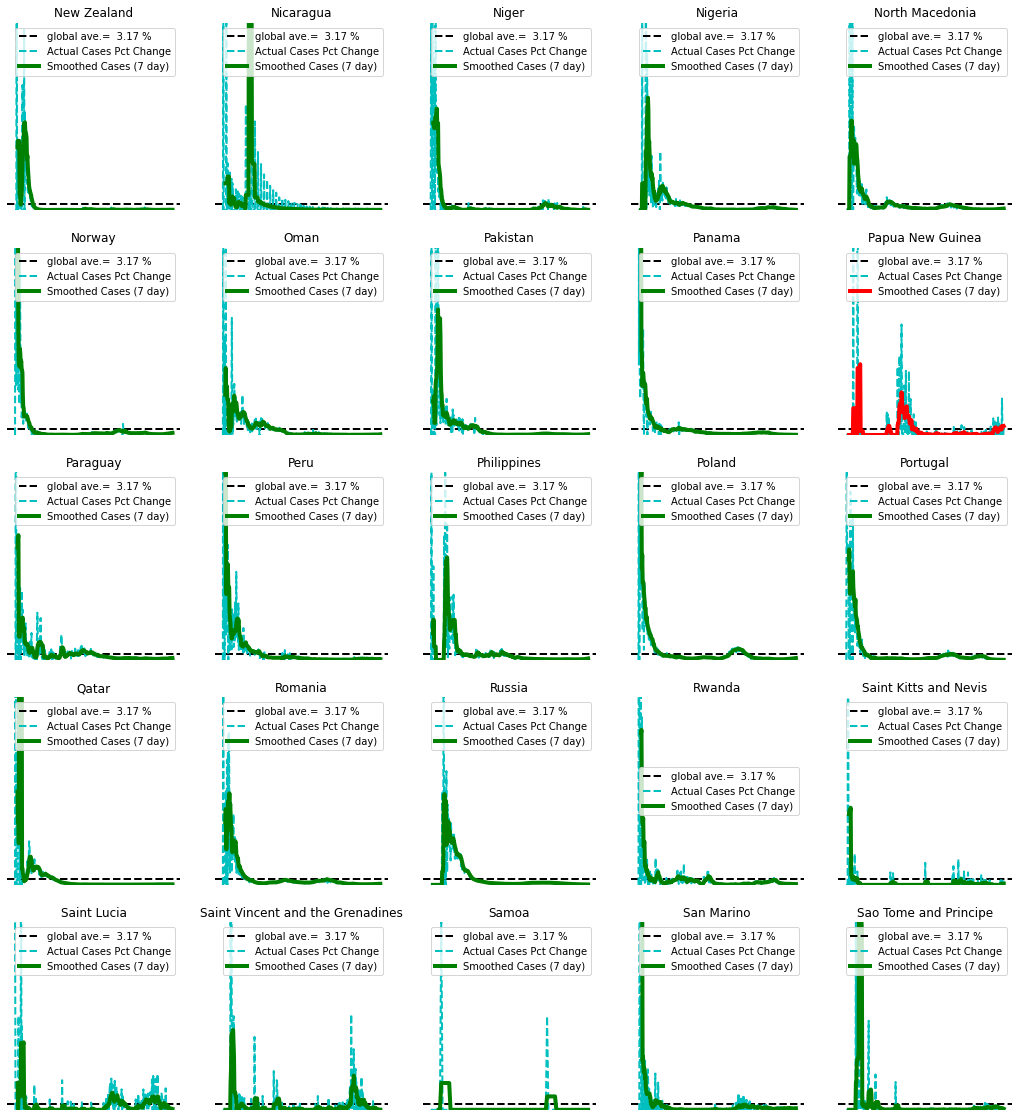

In [11]:
k += 25
plot_cases(k)

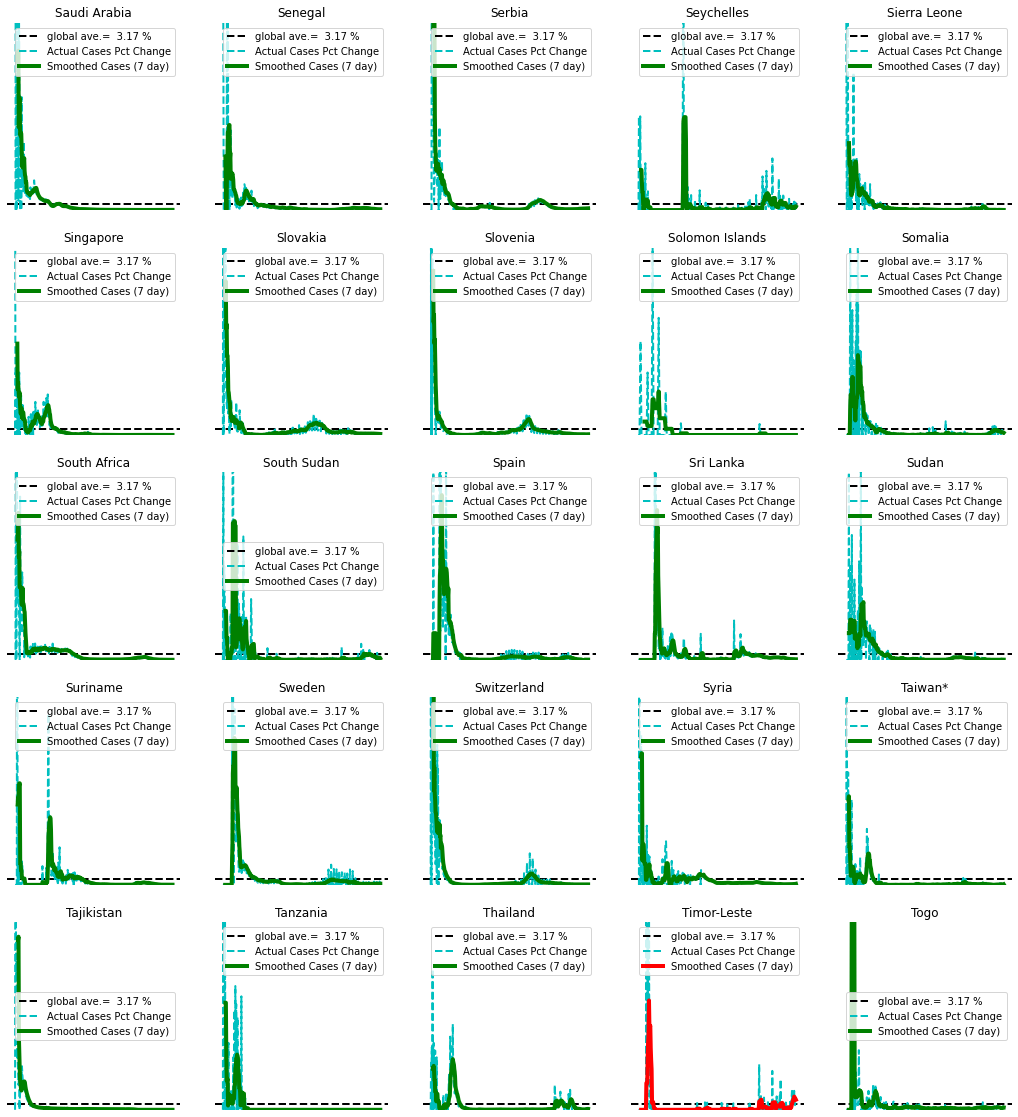

In [12]:
k += 25
plot_cases(k)

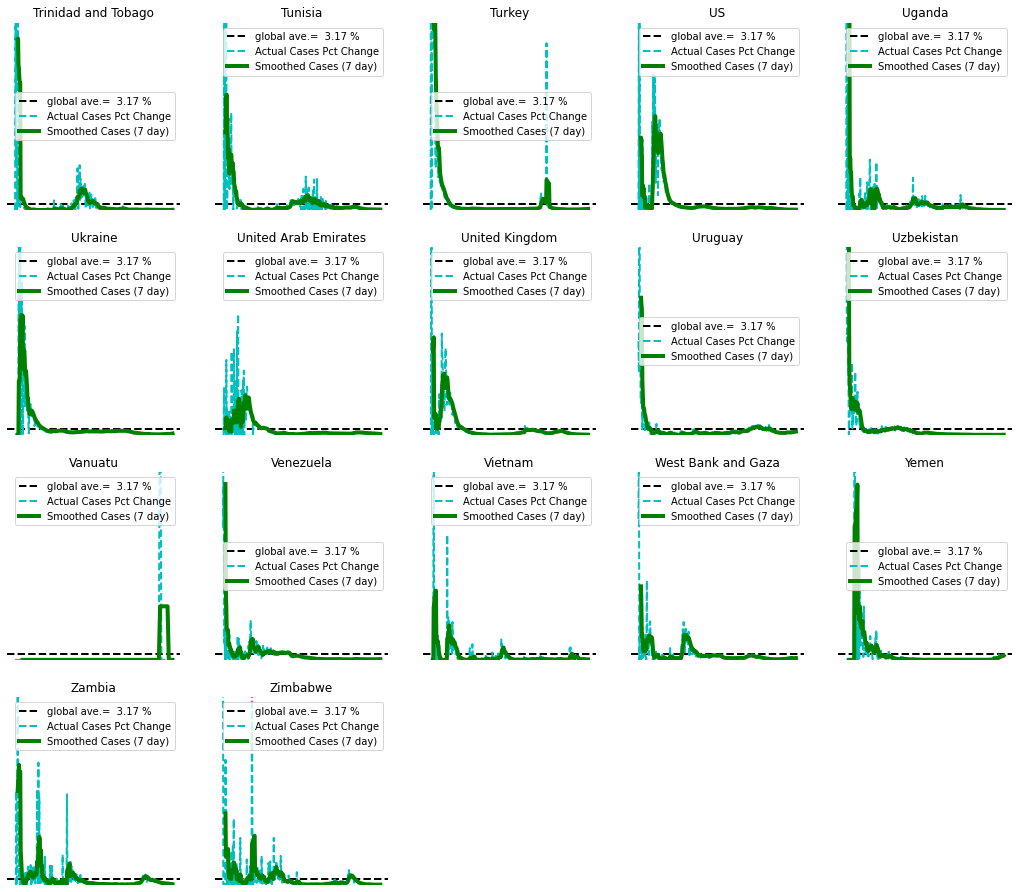

In [13]:
k += 25
plot_cases(k)

# COVID19 ASEAN Cases Comparison

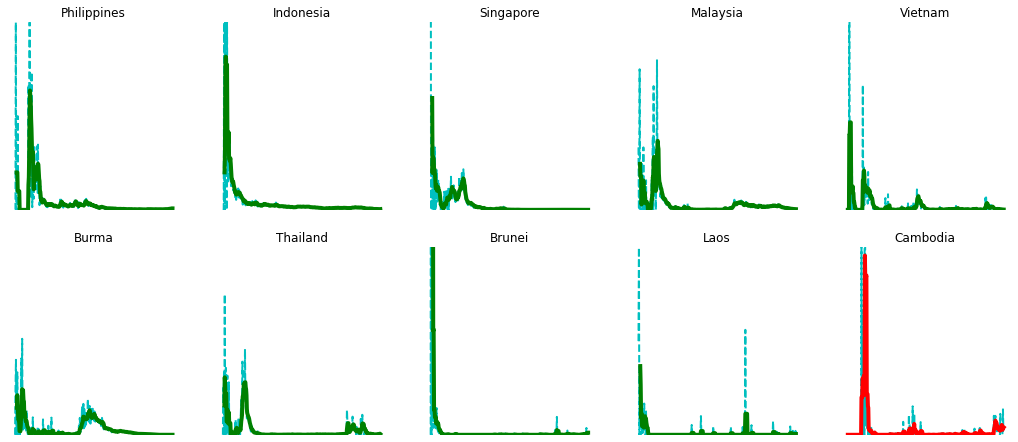

In [14]:
dates   = confirmed.keys()
ASEAN = ['Philippines', 'Indonesia',  'Singapore', 'Malaysia', 'Vietnam', 'Burma', 'Thailand', 'Brunei', 'Laos', 'Cambodia']

def plot_cases2(country_list, start = 0, batch_sz= 25, columns = 5): 
    rows    = int(np.ceil(batch_sz/columns))
    fig     = plt.figure(figsize=(18, 4*rows))
    color   = None

    for i in range(1, columns*rows + 1):
        idx = start + i
        if idx <= len(country_list):
            country = country_list[idx-1]
            cases = pd.Series([confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates])
            cases_ac = cases.pct_change()
            cases_ma = cases_ac.rolling(window=5).mean()

            if cases_ma.iloc[-1] <= world_mean_change:
                color = 'green'
            else:
                color = 'red'
            fig.add_subplot(rows, columns, i)
            plt.plot(range(len(dates)), cases_ac, 'c--', linewidth=2)
            plt.plot(range(len(dates)), cases_ma, linewidth=4, color = color)
            plt.title(f'{country}')
            plt.ylim([0, 1.0])
            plt.axis('off')

    plt.show()
    
    
plot_cases2(ASEAN)

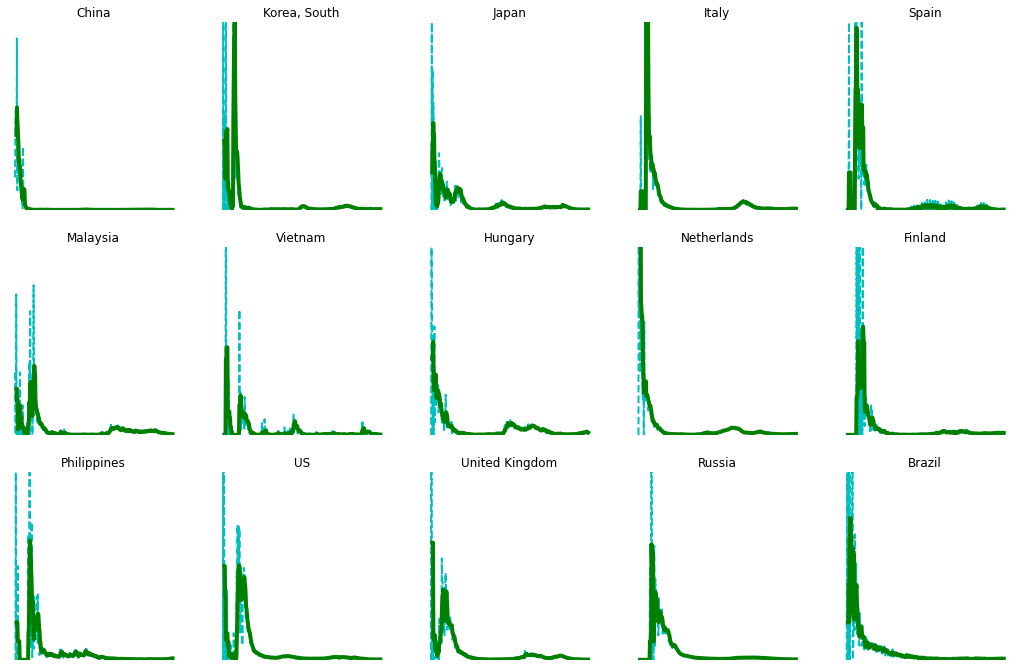

In [15]:
Assorted = ['China', 'Korea, South', 'Japan', 'Italy', 'Spain', 'Malaysia', 'Vietnam', 'Hungary', 'Netherlands', 'Finland','Philippines', 'US',  'United Kingdom','Russia',  'Brazil']

plot_cases2(Assorted)

> Disclaimer: *Educational purposes ONLY and is not intended to be used in any other purposes, including but not limited to any political agenda and so on*.